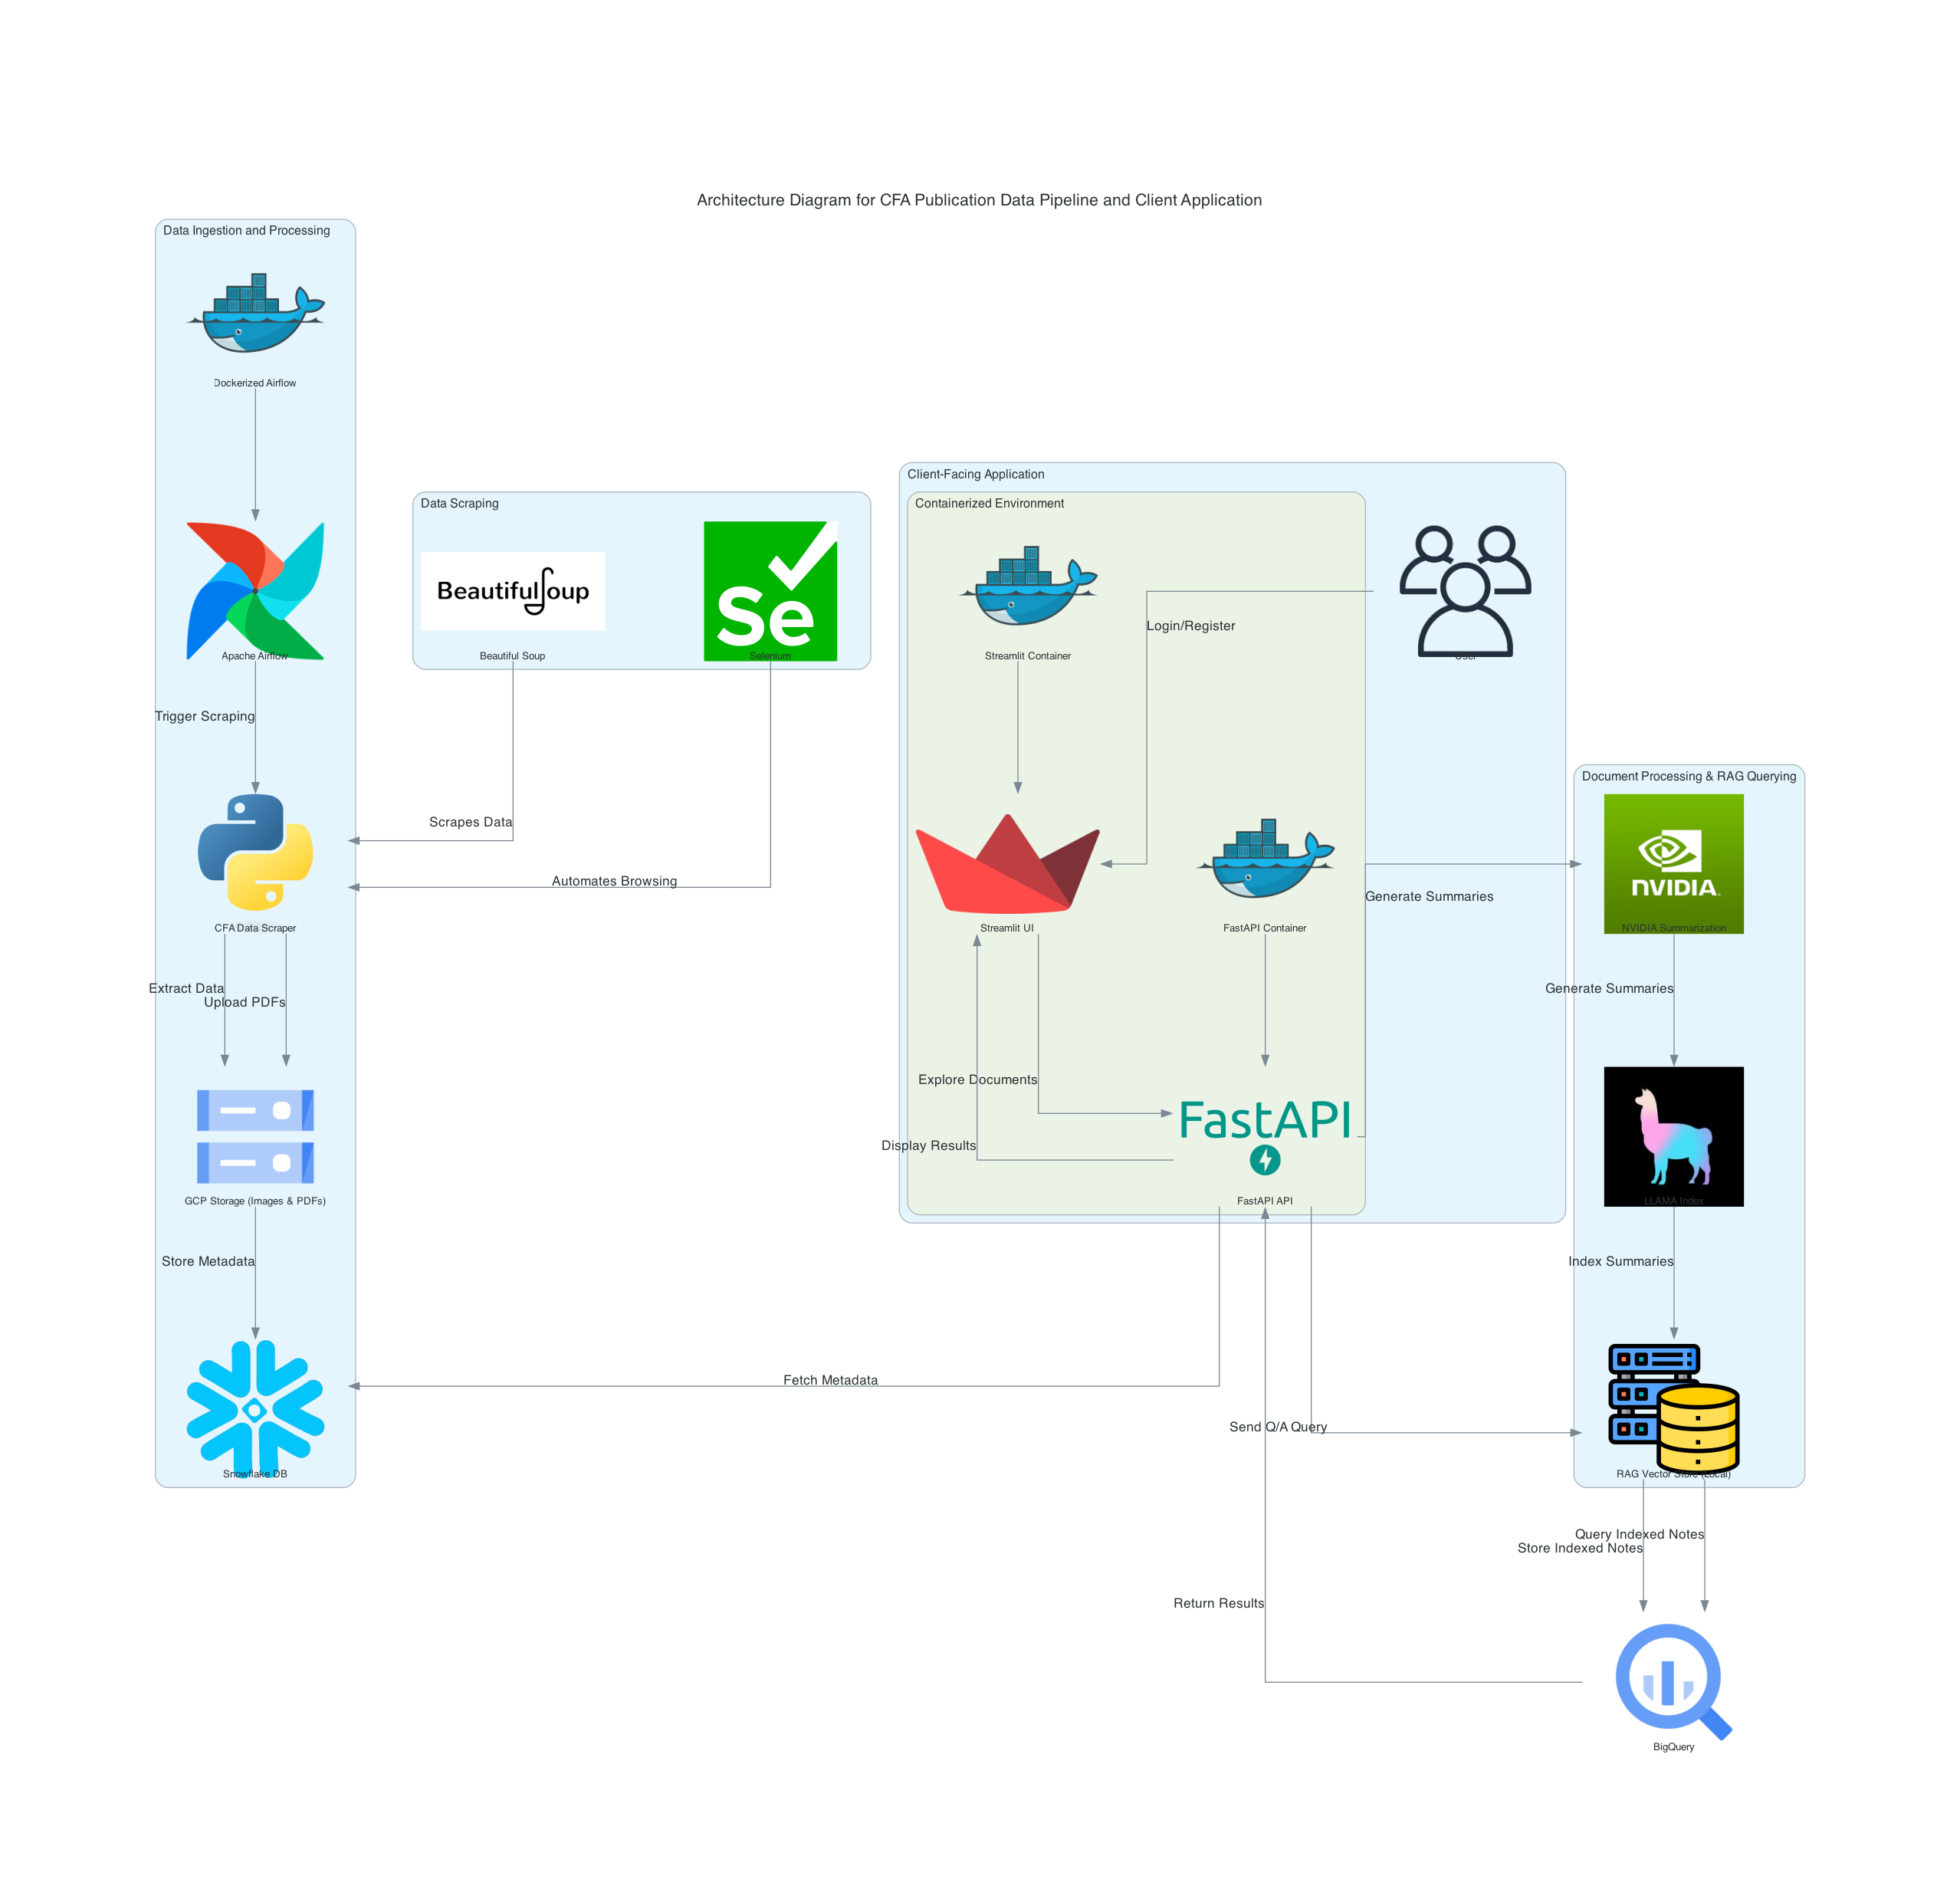

In [67]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.gcp.storage import GCS
from diagrams.gcp.analytics import BigQuery as GCPBigQuery
from diagrams.onprem.client import Users
from diagrams.onprem.container import Docker
from diagrams.onprem.workflow import Airflow
from diagrams.saas.analytics import Snowflake
from diagrams.aws.ml import Sagemaker
from diagrams.programming.language import Python

# Specify the paths to images
beautifulsoup_logo = "beautifulsoup_logo.png"  
selenium_logo = "selenium_logo.png"  
streamlit_logo = "streamlit_logo.png"  
fastapi_logo = "fastapi_logo.png"
airflow_logo = "airflow_logo.png"
huggingface_logo = "huggingface_logo.png"
bigquery_logo = "bigquery_logo.png"
openai_logo = "openai_logo.png"
snowflake_logo = "snowflake_logo.png"
llama_index_logo = "llama_index_logo.png"
nvidia_logo = "nvidia_logo.png"
rag_local_storage_logo = "rag_local_storage_logo.png"  # Add an icon for local storage, e.g., a file icon
python_icon = "python_icon.png"  

# Diagram attributes with adjustments for title display
graph_attr = {
    "fontsize": "16",  # Increase font size for better readability
    "labelloc": "t",
    "label": "\n\nArchitecture Diagram for CFA Publication Data Pipeline and Client Application",  # Adding line breaks before and after for padding
    "ranksep": "1.8",
    "nodesep": "1.0",
}

node_attr = {
    "fontsize": "10",
    "width": "2.5",
    "height": "1.5",
}

with Diagram("architecture_diagram", show=False, graph_attr=graph_attr, node_attr=node_attr, direction="TB") as diag:
    
    # Client Interaction Cluster
    with Cluster("Client-Facing Application"):
        user = Users("User")
        with Cluster("Containerized Environment"):
            docker_streamlit = Docker("Streamlit Container")
            docker_fastapi = Docker("FastAPI Container")
            streamlit_ui = Custom("Streamlit UI", streamlit_logo)
            fastapi_api = Custom("FastAPI API", fastapi_logo)

    # Data Ingestion and Processing Cluster
    with Cluster("Data Ingestion and Processing"):
        docker_airflow = Docker("Dockerized Airflow")
        airflow = Airflow("Apache Airflow")
        scraper = Custom("CFA Data Scraper", python_icon)  
        gcs_storage = GCS("GCP Storage (Images & PDFs)")
        snowflake_db = Snowflake("Snowflake DB")

    # Create a BigQuery instance within the diagram context
    bigquery = GCPBigQuery("BigQuery")

    # Multi-modal Processing Cluster
    with Cluster("Document Processing & RAG Querying"):
        nvidia_services = Custom("NVIDIA Summarization", nvidia_logo)
        llama_index = Custom("LLAMA Index", llama_index_logo)
        rag_vector_local = Custom("RAG Vector Store (Local)", rag_local_storage_logo)
    
    # Data Scraping Cluster
    with Cluster("Data Scraping"):
        beautiful_soup = Custom("Beautiful Soup", beautifulsoup_logo)
        selenium = Custom("Selenium", selenium_logo)

    # User Interaction with Streamlit and FastAPI
    user >> Edge(xlabel="Login/Register") >> streamlit_ui
    streamlit_ui >> Edge(xlabel="Explore Documents") >> fastapi_api
    fastapi_api >> Edge(xlabel="Fetch Metadata") >> snowflake_db
    
    # Document Processing with RAG and NVIDIA Services
    fastapi_api >> Edge(xlabel="Send Q/A Query") >> rag_vector_local
    rag_vector_local >> Edge(xlabel="Query Indexed Notes") >> bigquery  
    bigquery >> Edge(xlabel="Return Results") >> fastapi_api
    fastapi_api >> Edge(xlabel="Generate Summaries") >> nvidia_services
    fastapi_api >> Edge(xlabel="Display Results") >> streamlit_ui
    
    # Automated Data Ingestion Pipeline
    docker_airflow >> airflow
    airflow >> Edge(xlabel="Trigger Scraping") >> scraper
    scraper >> Edge(xlabel="Extract Data") >> gcs_storage
    gcs_storage >> Edge(xlabel="Store Metadata") >> snowflake_db
    scraper >> Edge(xlabel="Upload PDFs") >> gcs_storage

    # Incremental Indexing and Research Notes Storage
    nvidia_services >> Edge(xlabel="Generate Summaries") >> llama_index
    llama_index >> Edge(xlabel="Index Summaries") >> rag_vector_local  # Using local storage for RAG
    rag_vector_local >> Edge(xlabel="Store Indexed Notes") >> bigquery  # Connect to BigQuery instance
    
    # Dockerized Deployment
    docker_streamlit >> streamlit_ui
    docker_fastapi >> fastapi_api

    # Data Scraping Flow
    beautiful_soup >> Edge(xlabel="Scrapes Data") >> scraper
    selenium >> Edge(xlabel="Automates Browsing") >> scraper

diag
